In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [3]:
data = pd.read_excel('./train.xlsx')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'High-LowClose','PriceChangeDay','PriceChangePreviousDay', 'VOLChange', 'EMA12', 'EMA26','БыстраяMACD', 'СигнальнаяMACD(9)-быстраяMACD',
    'Stohastic','Momentum','Повышенияцензакрытия','Среднееповышение7','Пониженияцензакрытия','Среднеепонижение7','RS','RSI','value_message'
]

# Категориальные признаки
cat_cols = [
    'TICKER','Отрасль','котировальныйсписок','уровеньликвидности','сигнал1','сигнал2','сигнал3','сигнал4','сигнал5'
]

feature_cols = num_cols + cat_cols
target_col = 'Manipulation'

In [5]:
print(data.shape)
data.head()

(8731, 29)


,TICKER,Отрасль,котировальныйсписок,уровеньликвидности,TIME,High-LowClose,PriceChangeDay,PriceChangePreviousDay,VOL,VOLChange,...,сигнал4,Повышенияцензакрытия,Среднееповышение7,Пониженияцензакрытия,Среднеепонижение7,RS,RSI,сигнал5,value_message,Manipulation
0,ABRD,Производство продуктов и напитков,Третий уровень,Средний,2023-05-05,0.036,-0.0138,0.0000,178130,0.0000,...,нетсигнала,0.0,0.0,0.0,0.0,0.0,0.0,нетсигнала,0.016000,0
1,ABRD,Производство продуктов и напитков,Третий уровень,Средний,2023-05-08,0.022,-0.0140,-0.0120,30900,-0.8265,...,нетсигнала,0.0,0.0,3.0,0.0,0.0,0.0,нетсигнала,0.000000,0
2,ABRD,Производство продуктов и напитков,Третий уровень,Средний,2023-05-10,0.039,0.0343,0.0385,178110,4.7641,...,нетсигнала,9.5,0.0,0.0,0.0,0.0,0.0,нетсигнала,199.291081,0
3,ABRD,Производство продуктов и напитков,Третий уровень,Средний,2023-05-11,0.029,0.0058,0.0195,333730,0.8737,...,нетсигнала,5.0,0.0,0.0,0.0,0.0,0.0,нетсигнала,0.076000,0
4,ABRD,Производство продуктов и напитков,Третий уровень,Средний,2023-05-12,0.039,-0.0095,-0.0076,222710,-0.3327,...,нетсигнала,0.0,0.0,2.0,0.0,0.0,0.0,нетсигнала,145.746016,1


In [6]:
#Анализ числовых переменных

In [7]:
data[num_cols].dtypes

High-LowClose                    float64
PriceChangeDay                   float64
PriceChangePreviousDay           float64
VOLChange                        float64
EMA12                            float64
EMA26                            float64
БыстраяMACD                      float64
СигнальнаяMACD(9)-быстраяMACD    float64
Stohastic                        float64
Momentum                         float64
Повышенияцензакрытия             float64
Среднееповышение7                float64
Пониженияцензакрытия             float64
Среднеепонижение7                float64
RS                               float64
RSI                              float64
value_message                    float64
dtype: object

In [8]:
data[cat_cols].dtypes

TICKER                 object
Отрасль                object
котировальныйсписок    object
уровеньликвидности     object
сигнал1                object
сигнал2                object
сигнал3                object
сигнал4                object
сигнал5                object
dtype: object

In [9]:
(data
 .isna()
 .sum()
 .reset_index()
 .rename(columns={'index':'feature'
                  ,0:'cnt_of_nans'}
        )
 .sort_values('cnt_of_nans'
              ,ascending=False))

,feature,cnt_of_nans
0,TICKER,0
15,сигнал2,0
27,value_message,0
26,сигнал5,0
25,RSI,0
24,RS,0
23,Среднеепонижение7,0
22,Пониженияцензакрытия,0
21,Среднееповышение7,0
20,Повышенияцензакрытия,0


In [10]:
data[num_cols].describe()

,High-LowClose,PriceChangeDay,PriceChangePreviousDay,VOLChange,EMA12,EMA26,БыстраяMACD,СигнальнаяMACD(9)-быстраяMACD,Stohastic,Momentum,Повышенияцензакрытия,Среднееповышение7,Пониженияцензакрытия,Среднеепонижение7,RS,RSI,value_message
count,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000
mean,0.037149,0.002038,0.002785,0.665907,0.001894,0.001495,8.994516,7.045650,0.341409,0.765874,13.461936,11.619224,10.895883,8.910243,2.833117,41.977175,31.452331
std,0.041163,0.073638,0.032578,10.132690,0.009906,0.005946,140.475126,107.585032,0.412555,0.447157,109.316432,56.912281,131.680116,53.262474,15.386631,32.064741,83.843480
min,0.000000,-0.406700,-0.471100,-0.996900,-0.148667,-0.071553,-3022.852922,-2642.093718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.018000,-0.011200,-0.009000,-0.344850,-0.001355,-0.000629,-0.192669,-0.102637,0.000000,0.289250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.027000,-0.000900,0.000000,-0.013500,0.001129,0.000916,0.326063,0.140879,0.071200,0.994400,0.000000,0.897143,0.000000,0.557143,0.854839,46.086957,0.020000
75%,0.043000,0.010300,0.011500,0.439400,0.005057,0.003626,6.909385,4.521264,0.815050,1.036250,3.305000,7.050000,2.200000,4.835714,2.319199,69.872249,26.758012
max,1.187000,3.845400,1.159600,802.363600,0.123951,0.066612,2395.270844,1750.330213,1.000000,1.918400,7600.000000,1685.714286,11351.000000,1693.000000,796.000000,99.874529,2999.900311


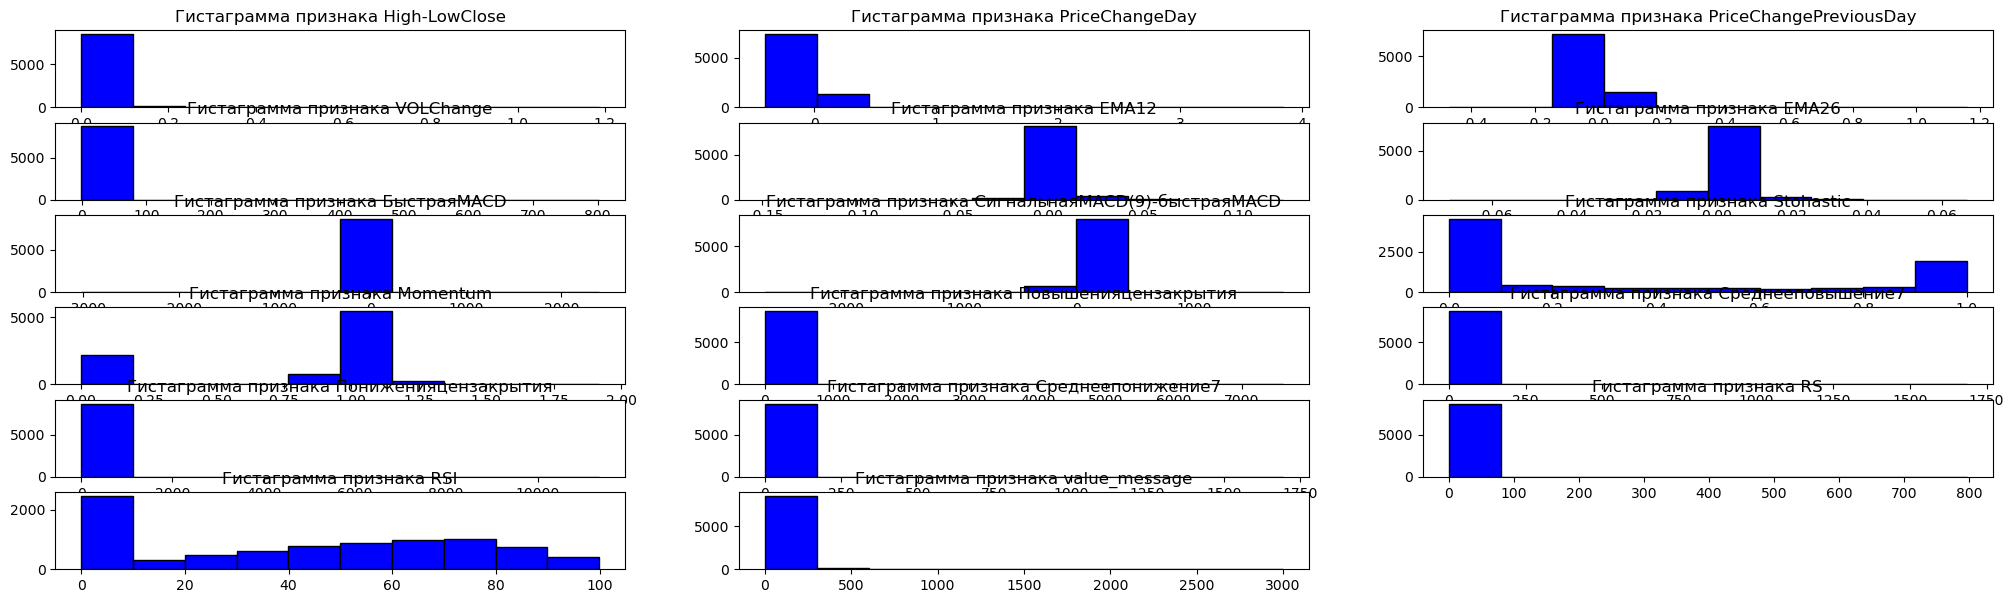

In [11]:
count=1
plt.figure(figsize=[25,7])
ncols = 3
nrows = int(np.ceil(len(num_cols)/ncols))
for i in num_cols:
    
    plt.subplot(nrows,ncols,count)
    plt.hist(data[i], color = 'blue', edgecolor = 'black')
    plt.title(f'Гистаграмма признака {i}')
    
    count+=1
    
plt.show()

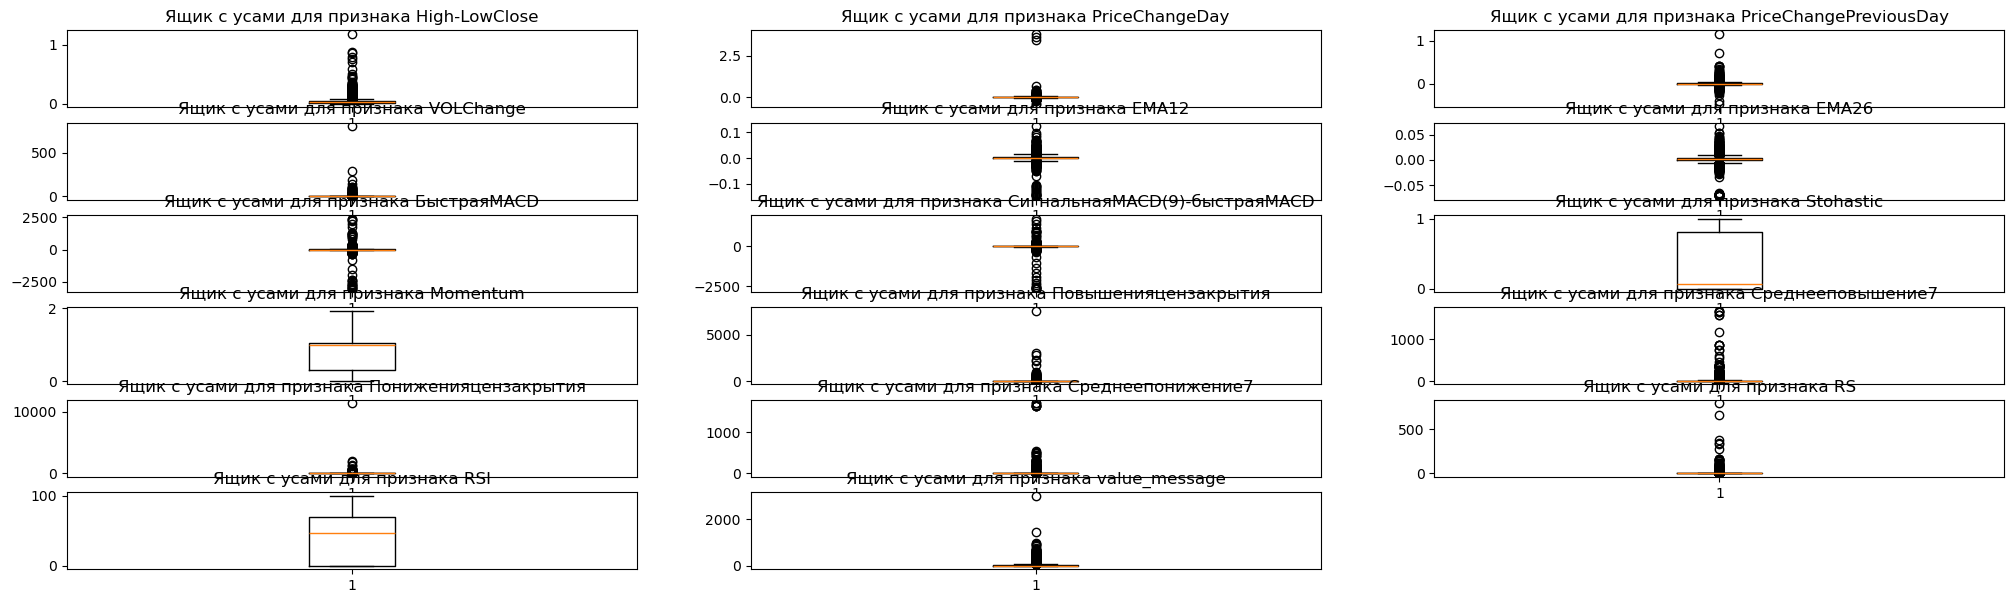

In [12]:
count=1
plt.figure(figsize=[25,7])
ncols = 3
nrows = int(np.ceil(len(num_cols)/ncols))
for i in num_cols:
    plt.subplot(nrows,ncols,count)
    plt.boxplot(data[i].fillna(data[i].median()))
    plt.title(f'Ящик с усами для признака {i}')
    
    count+=1
    
plt.show()

In [13]:
for i in cat_cols:
    print(f'Исследуемый признак {i}')
    display(data[i].value_counts())
    print('-'*100)

Исследуемый признак TICKER


TICKER
SMLT    372
YNDX    321
AFKS    304
ROSN    285
NVTK    224
       ... 
KMEZ     17
VSMO     16
SOFL     16
KOGK     15
EUTR      9
Name: count, Length: 114, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак Отрасль


Отрасль
Нефтегазовая отрасль                               1529
Холдинги                                            756
ИТ сервисы и программное обеспечение                639
Электроэнергетика                                   547
Химическая и нефтехимическая промышленность         451
Строительство зданий                                441
Черная металлургия                                  439
FMCG ретейл                                         354
Цветная металлургия                                 350
Добыча драгоценных металлов                         330
Банки                                               285
Производство продуктов и напитков                   249
Производство автотранспорта                         227
Связь и телекоммуникация                            197
Водный транспорт                                    194
Производство лекарств и биотехнологии               167
Медицинские услуги                                  163
АПК и сельское хозяйство                

----------------------------------------------------------------------------------------------------
Исследуемый признак котировальныйсписок


котировальныйсписок
Первый уровень    5984
Третий уровень    1710
Второй уровень    1037
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак уровеньликвидности


уровеньликвидности
Высокий    6186
Средний    1645
Низкий      900
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак сигнал1


сигнал1
нетсигнала    8658
покупать        73
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак сигнал2


сигнал2
нетсигнала    8374
покупать       357
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак сигнал3


сигнал3
нетсигнала    8182
покупать       549
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак сигнал4


сигнал4
нетсигнала    8238
покупать       493
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак сигнал5


сигнал5
нетсигнала    8377
покупать       354
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------


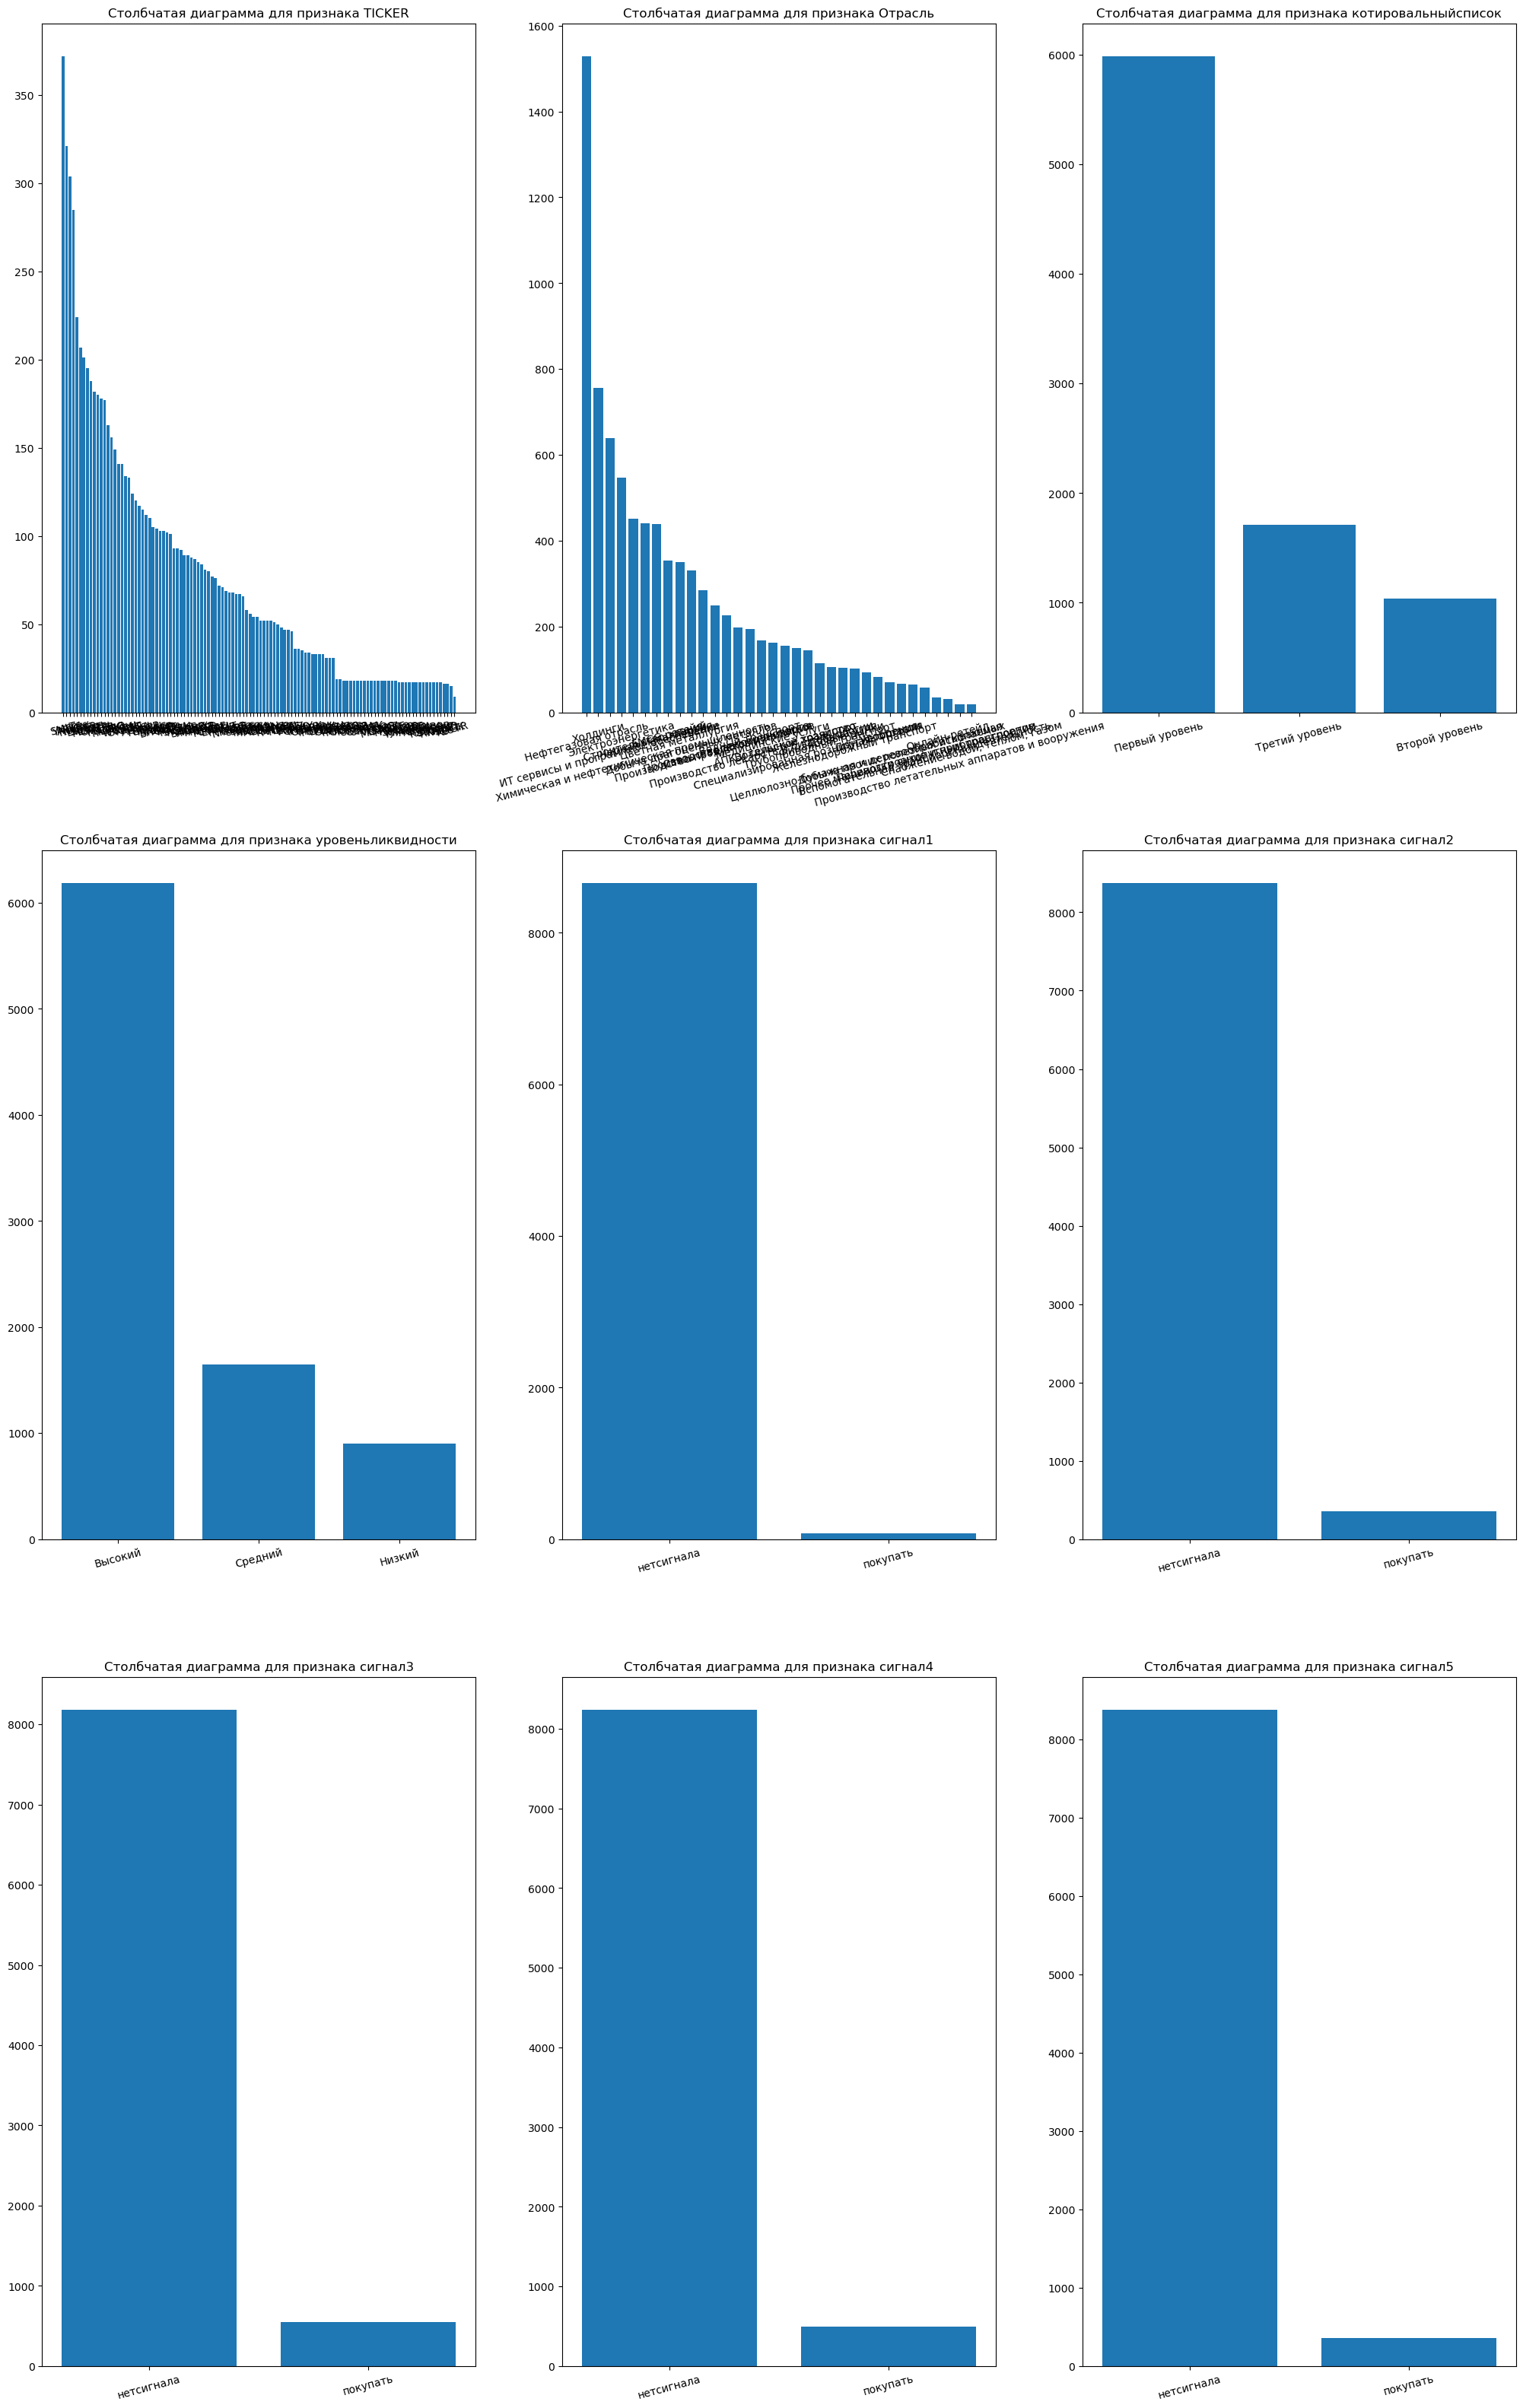

In [14]:
count=1
plt.figure(figsize=[25,40])
ncols = 3
nrows = int(np.ceil(len(cat_cols)/ncols))
for i in cat_cols:
    plt.subplot(nrows,ncols,count)
    plt.bar(data[i].value_counts().index,data[i].value_counts().values)
    plt.title(f'Столбчатая диаграмма для признака {i}')
    plt.xticks(rotation=15)
    
    count+=1
    
plt.show()

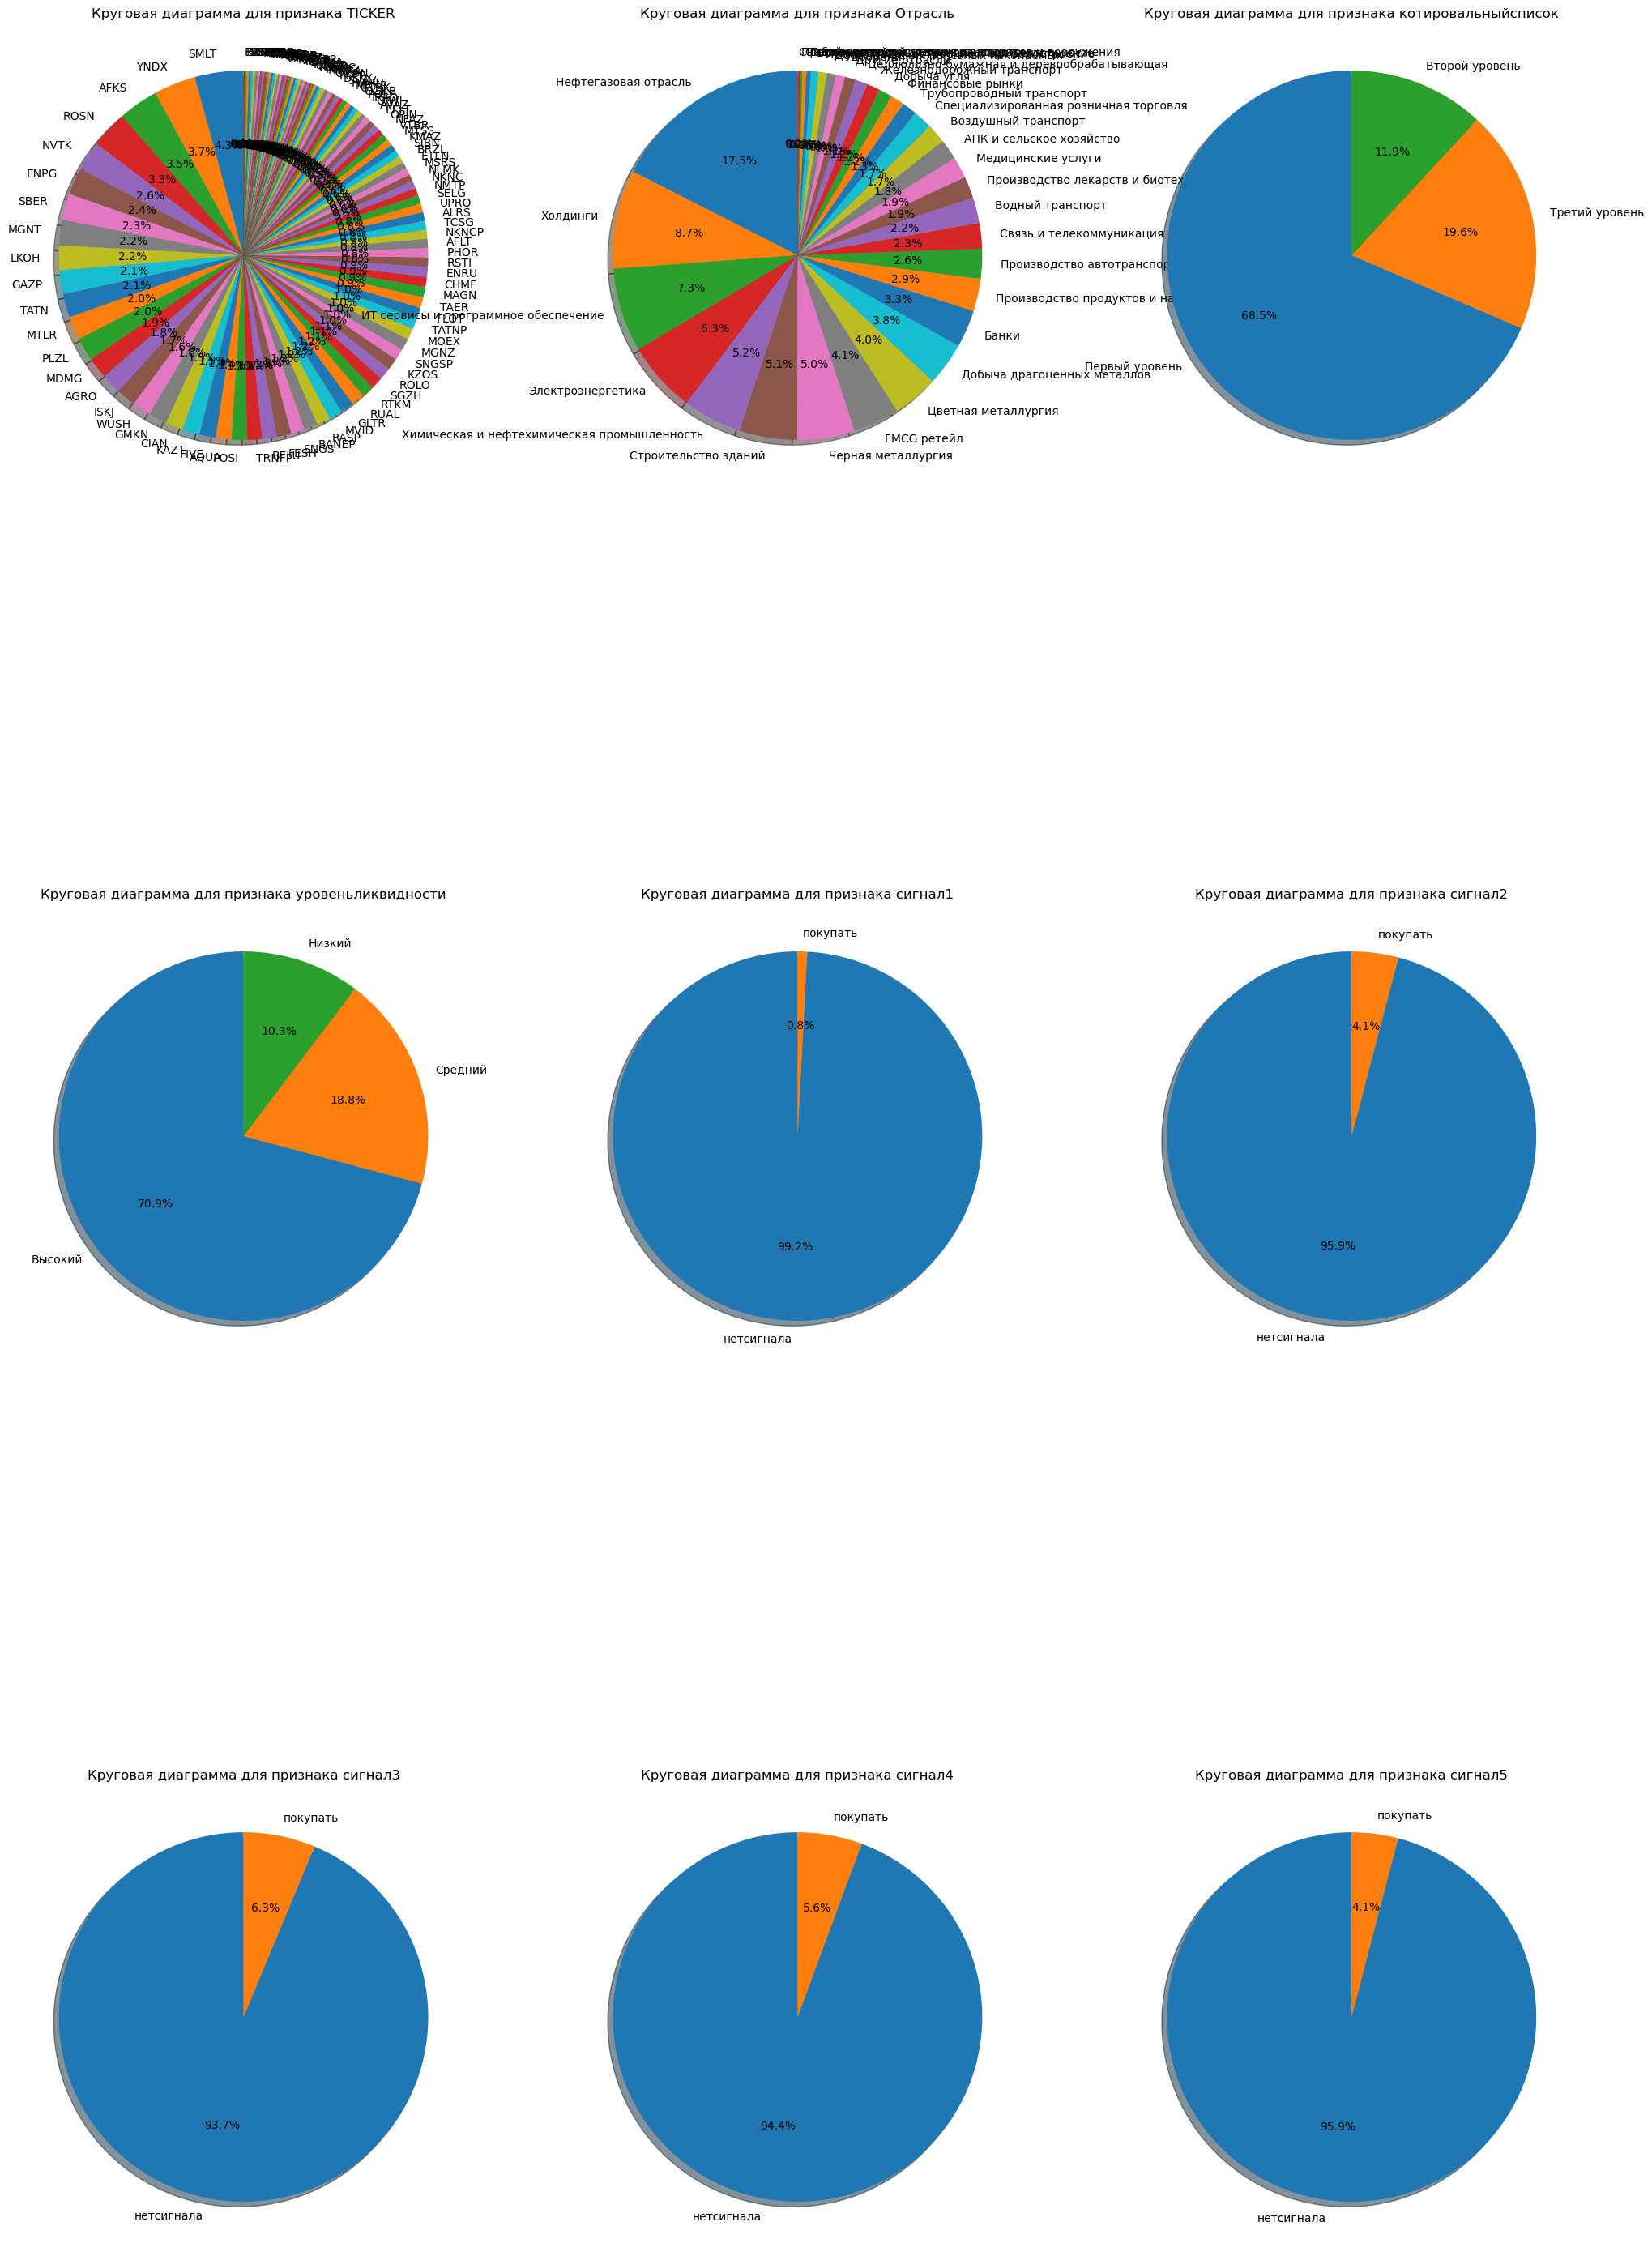

In [15]:
count=1
plt.figure(figsize=[25,40])
ncols = 3
nrows = int(np.ceil(len(cat_cols)/ncols))
for i in cat_cols:
    plt.subplot(nrows,ncols,count)
    plt.pie(x=data[i].value_counts().values,
            labels=data[i].value_counts().index,
            startangle=90,
            autopct='%1.1f%%',
            shadow=True
           )
    plt.title(f'Круговая диаграмма для признака {i}')
    
    count+=1
    
plt.show()

In [16]:
# Количество значений в целевой переменной и их доля

data[target_col].value_counts(), data[target_col].value_counts(normalize=True)

(Manipulation
 0    4472
 1    4259
 Name: count, dtype: int64,
 Manipulation
 0    0.512198
 1    0.487802
 Name: proportion, dtype: float64)

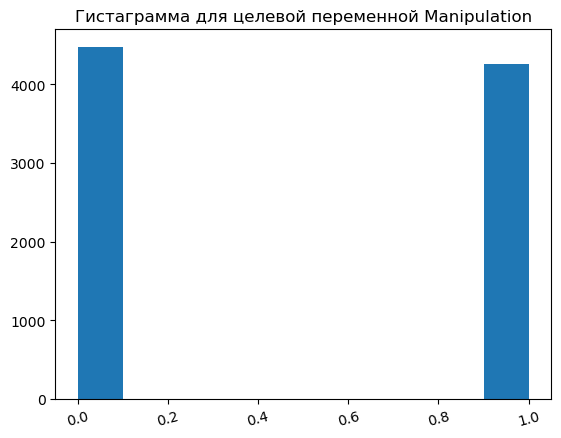

In [17]:
# Гистаграмма по целевой переменной

plt.hist(data[target_col])
plt.title(f'Гистаграмма для целевой переменной {target_col}')
plt.xticks(rotation=15)
plt.show()

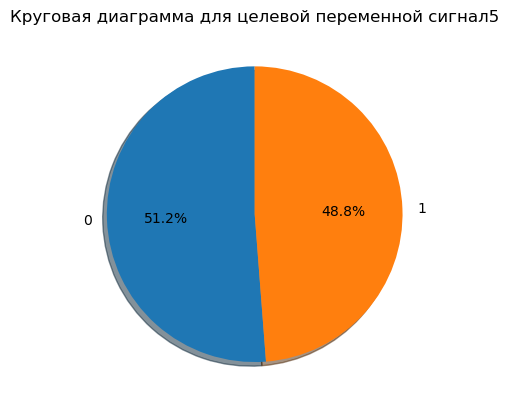

In [18]:
# Круговая диаграмма

plt.pie(x=data[target_col].value_counts().values,
        labels=data[target_col].value_counts().index,
        startangle=90,
        autopct='%1.1f%%',
        shadow=True
       )
plt.title(f'Круговая диаграмма для целевой переменной {i}')
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [20]:
# Разделим нашу выборку на трейн / валид в соотношении 75 / 25 
# Это необходимо для тестрирования стабильности наших алгоритмов и детекции переобучения

train, valid = train_test_split(data, test_size=0.25, random_state=42)
train, valid = train.reset_index(drop=True), valid.reset_index(drop=True)

print(train.shape, valid.shape)

(6548, 29) (2183, 29)


In [21]:
# Для числовых фичей обучим StandartScaler

scl = StandardScaler()
scl.fit(train[num_cols])

train[[f'{i}_sc' for i in num_cols]] = scl.transform(train[num_cols])
valid[[f'{i}_sc' for i in num_cols]] = scl.transform(valid[num_cols])

In [22]:
# Для категориальных фичей обучим OHE

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(train[cat_cols])

train = train.join(pd.DataFrame(ohe.transform(train[cat_cols]),columns=ohe.get_feature_names_out()))
valid = valid.join(pd.DataFrame(ohe.transform(valid[cat_cols]),columns=ohe.get_feature_names_out()))

In [23]:
train.head(2)

,TICKER,Отрасль,котировальныйсписок,уровеньликвидности,TIME,High-LowClose,PriceChangeDay,PriceChangePreviousDay,VOL,VOLChange,...,сигнал1_нетсигнала,сигнал1_покупать,сигнал2_нетсигнала,сигнал2_покупать,сигнал3_нетсигнала,сигнал3_покупать,сигнал4_нетсигнала,сигнал4_покупать,сигнал5_нетсигнала,сигнал5_покупать
0,MTLR,Черная металлургия,Первый уровень,Высокий,2023-06-05,0.039,-0.0342,-0.0318,5529805,-0.5175,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,CARM,Финансовые рынки,Третий уровень,Средний,2023-11-15,0.063,0.0115,0.0111,11277500,-0.1515,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [24]:
# Создадим лист полученных факторов

cols = [f'{i}_sc' for i in num_cols] + ohe.get_feature_names_out().tolist()
len(cols)

181

In [25]:
# Зададим алгоритм и его сетку гиперпараметров
params_logreg = {'random_state':42}
model_logreg = LogisticRegression(**params_logreg)
param_name = 'C'
grid = [100, 10, 1, 0.1, 0.01, 0.001]
parameters = {param_name:grid}
parameters

{'C': [100, 10, 1, 0.1, 0.01, 0.001]}

In [26]:
CV_model_logreg = GridSearchCV(estimator=model_logreg,
                               param_grid=parameters,
                               cv=3,
                               scoring='roc_auc',
                               n_jobs=-1,
                               verbose=0
                              )

CV_model_logreg.fit(train[cols], train[target_col])

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]},
             scoring='roc_auc')

In [27]:
# Среднее значение метрики ROC-AUC на test множествe

means = CV_model_logreg.cv_results_['mean_test_score']
means

array([0.71576952, 0.71698689, 0.72048448, 0.72803702, 0.72790585,
       0.71854601])

In [28]:
# Стандартные отклонения метрики ROC-AUC на test множествe

error = CV_model_logreg.cv_results_['std_test_score']
error

array([0.00867935, 0.0085698 , 0.00853501, 0.00856954, 0.0113013 ,
       0.0157645 ])

In [29]:
# Лучшее значение параметра С в LogisticRegression на нашем датасете

CV_model_logreg.best_params_

{'C': 0.1}

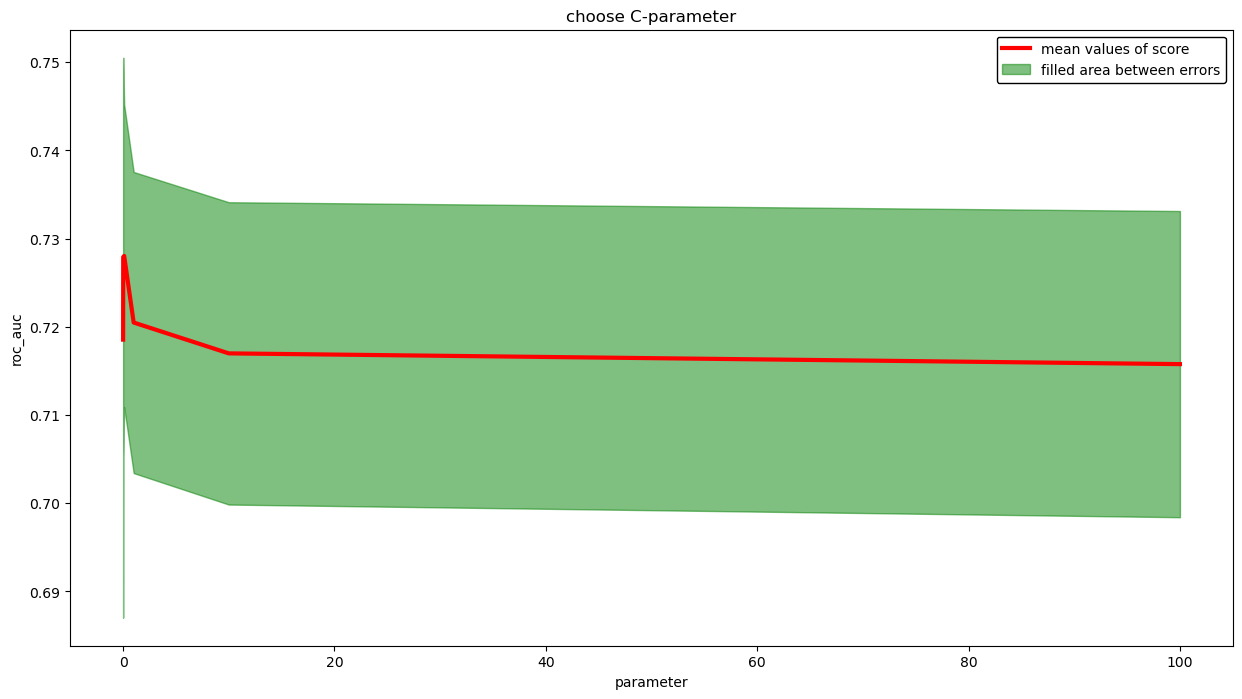

In [30]:
# Отрисуем изменение метрики ROC-AUC при изменении параметра С

plt.figure(figsize=(15,8))
plt.title(f'choose {param_name}-parameter')

plt.plot(grid, means, label='mean values of score', color='red', lw=3)

plt.fill_between(grid, means - 2 * error, means + 2 * error,
                 color='green', label='filled area between errors', alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('parameter')
plt.ylabel('roc_auc')
plt.show()

In [31]:
# Используя подобранные параметры обучим модель на train множестве и применим на valid множестве для проверки
params_logreg.update(CV_model_logreg.best_params_)

best_logreg = LogisticRegression(**params_logreg)

best_logreg.fit(train[cols], train[target_col])
y_train_predicted = best_logreg.predict_proba(train[cols])[:, 1]
y_valid_predicted = best_logreg.predict_proba(valid[cols])[:, 1]

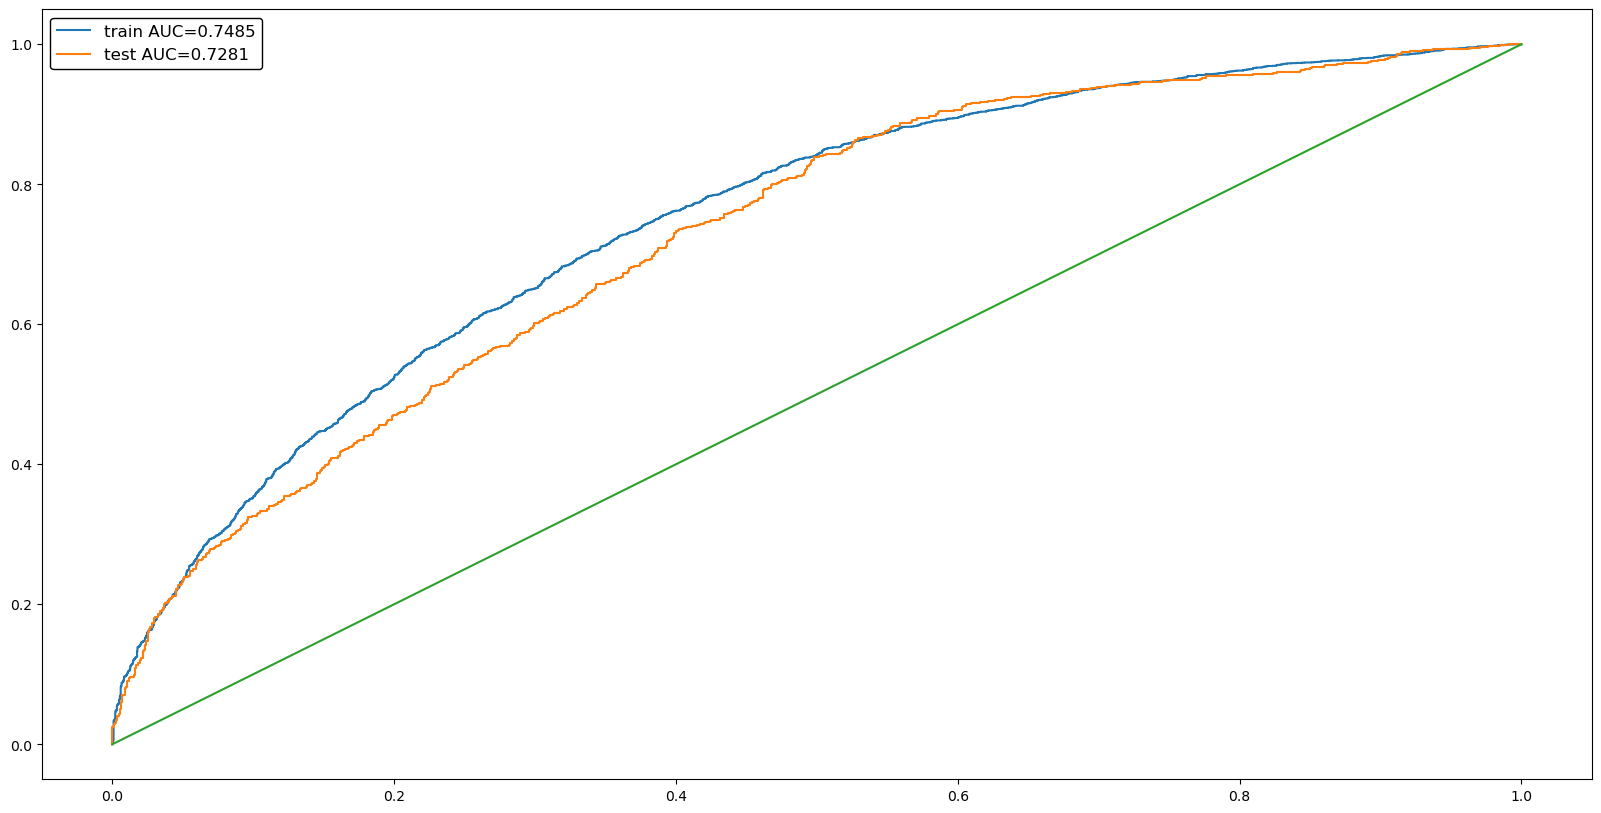

In [32]:
# Рассчитаем ROC-AUC и отрисуем ROC curve обученной модели

from sklearn.metrics import roc_curve

train_auc = roc_auc_score(train[target_col], y_train_predicted)
test_auc = roc_auc_score(valid[target_col], y_valid_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(train[target_col], y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(valid[target_col], y_valid_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [33]:
#Значение надежнотси для модели логистической регрессии
y_train_predicted = best_logreg.predict(train[cols])
y_valid_predicted = best_logreg.predict(valid[cols])

# Вычисление метрик для тренировочного набора
train_accuracy = accuracy_score(train[target_col], y_train_predicted)
train_recall = recall_score(train[target_col], y_train_predicted)
train_precision = precision_score(train[target_col], y_train_predicted)
train_f1 = f1_score(train[target_col], y_train_predicted)
train_auc_roc = roc_auc_score(train[target_col], y_train_predicted)

# Вычисление метрик для тестового набора
test_accuracy = accuracy_score(valid[target_col], y_valid_predicted)
test_recall = recall_score(valid[target_col], y_valid_predicted)
test_precision = precision_score(valid[target_col], y_valid_predicted)
test_f1 = f1_score(valid[target_col], y_valid_predicted)
test_auc_roc = roc_auc_score(valid[target_col], y_valid_predicted)

# Вывод результатов
print("Тренировочный набор:")
print(f"Accuracy: {train_accuracy:.5f}")
print(f"Recall: {train_recall:.5f}")
print(f"Precision: {train_precision:.5f}")
print(f"F1-score: {train_f1:.5f}")
print(f"AUC-ROC: {train_auc_roc:.5f}")

print("\nТестовый набор:")
print(f"Accuracy: {test_accuracy:.5f}")
print(f"Recall: {test_recall:.5f}")
print(f"Precision: {test_precision:.5f}")
print(f"F1-score: {test_f1:.5f}")
print(f"AUC-ROC: {test_auc_roc:.5f}")

Тренировочный набор:
Accuracy: 0.68005
Recall: 0.75604
Precision: 0.64673
F1-score: 0.69712
AUC-ROC: 0.68198

Тестовый набор:
Accuracy: 0.66148
Recall: 0.74206
Precision: 0.63166
F1-score: 0.68242
AUC-ROC: 0.66303


In [34]:
import catboost as ctb

In [35]:
train_auc = roc_auc_score(train[target_col], y_train_predicted)
test_auc = roc_auc_score(valid[target_col], y_valid_predicted)

In [36]:
# Тренировочная выборка была разделена во второй части на train/valid.
## Обучим и применим базовую модель CatBoostClassifier

params_ctb = {'random_state':42}

base_ctb = ctb.CatBoostClassifier(**params_ctb)

base_ctb.fit(X=train[feature_cols],
              y=train[target_col],
              cat_features=cat_cols,
              eval_set=(valid[feature_cols], valid[target_col]),
              use_best_model=True,
              verbose=100
             )

Learning rate set to 0.050407
0:	learn: 0.6795351	test: 0.6795041	best: 0.6795041 (0)	total: 180ms	remaining: 3m
100:	learn: 0.5052357	test: 0.5369062	best: 0.5369062 (100)	total: 3.42s	remaining: 30.5s
200:	learn: 0.4615024	test: 0.5225874	best: 0.5225874 (200)	total: 7.85s	remaining: 31.2s
300:	learn: 0.4193125	test: 0.5119874	best: 0.5119842 (299)	total: 12.1s	remaining: 28.1s
400:	learn: 0.3858585	test: 0.5042036	best: 0.5042036 (400)	total: 16s	remaining: 23.9s
500:	learn: 0.3567369	test: 0.5003101	best: 0.5002592 (497)	total: 20.1s	remaining: 20s
600:	learn: 0.3313888	test: 0.4973287	best: 0.4973287 (600)	total: 24.8s	remaining: 16.5s
700:	learn: 0.3066614	test: 0.4963701	best: 0.4963701 (700)	total: 29.1s	remaining: 12.4s
800:	learn: 0.2864904	test: 0.4960379	best: 0.4953454 (723)	total: 33.3s	remaining: 8.26s
900:	learn: 0.2687836	test: 0.4937328	best: 0.4935142 (895)	total: 37.8s	remaining: 4.16s
999:	learn: 0.2528638	test: 0.4930518	best: 0.4926325 (934)	total: 43.9s	remainin

In [37]:
# Лучшее количество итераций:

base_ctb.best_iteration_

934

Learning rate set to 0.024468
0:	learn: 0.6864217	total: 36.1ms	remaining: 33.7s
100:	learn: 0.5359788	total: 2.75s	remaining: 22.7s
200:	learn: 0.5061980	total: 5.23s	remaining: 19.1s
300:	learn: 0.4851194	total: 7.66s	remaining: 16.1s
400:	learn: 0.4652751	total: 10.5s	remaining: 14s
500:	learn: 0.4426354	total: 13.1s	remaining: 11.3s
600:	learn: 0.4231108	total: 15.6s	remaining: 8.64s
700:	learn: 0.4057193	total: 18.1s	remaining: 6.01s
800:	learn: 0.3889071	total: 20.6s	remaining: 3.41s
900:	learn: 0.3731180	total: 23.1s	remaining: 846ms
933:	learn: 0.3688366	total: 23.9s	remaining: 0us


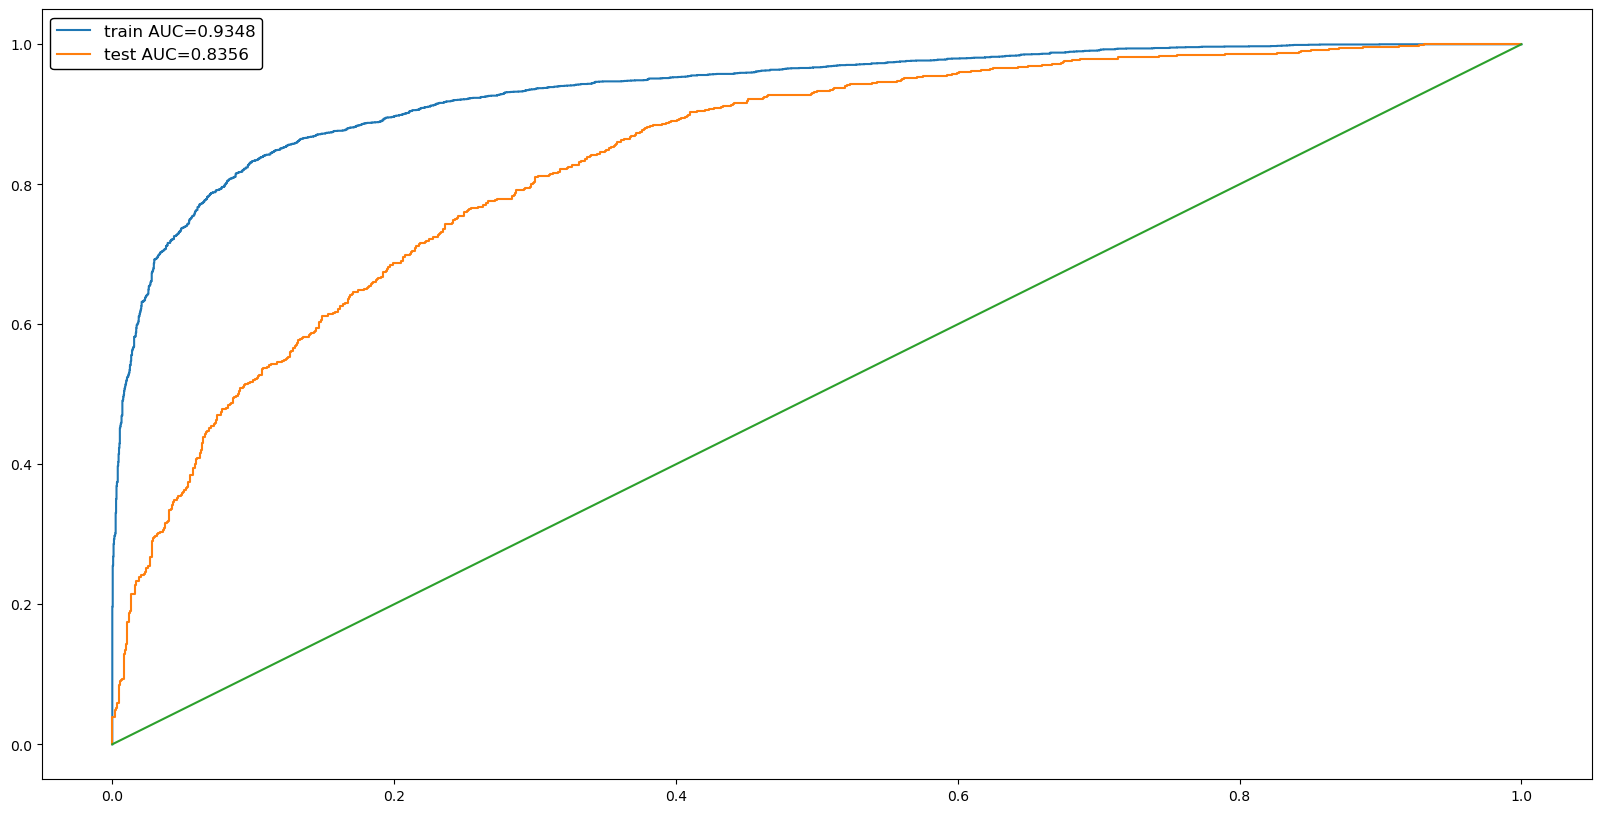

In [38]:
# Обновляем параметры кэтбуста, обучаем и применяем на валидационном множестве

params_ctb['iterations'] = base_ctb.best_iteration_

base_ctb = ctb.CatBoostClassifier(**params_ctb)
base_ctb.fit(X=train[feature_cols],
             y=train[target_col],
             cat_features=cat_cols,
             verbose=100
            )

y_train_predicted = base_ctb.predict_proba(train[feature_cols])[:, 1]
y_valid_predicted = base_ctb.predict_proba(valid[feature_cols])[:, 1]

train_auc = roc_auc_score(train[target_col], y_train_predicted)
test_auc = roc_auc_score(valid[target_col], y_valid_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(train[target_col], y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(valid[target_col], y_valid_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [39]:
# Для борьбы с переобучением:
## Запустим поиск гиперпараметров с использованием оригинальных количественных фичей и OHE для категориальных
### Будем использовать GridSearchCV с метрикой ROC-AUC

model_ctb = ctb.CatBoostClassifier()
params_ctb = {'iterations': [999],
              'depth': [4, 5, 6],
              'learning_rate':[0.01,0.03,0.05],
              'loss_function': ['Logloss', 'CrossEntropy'],
              'subsample':[0.6,0.9],
              'l2_leaf_reg': [3,1,5,10,100],
              'logging_level':['Silent'],
              'random_seed': [42]
         }

CV_model_ctb = GridSearchCV(estimator=model_ctb, 
                        param_grid=params_ctb, 
                        cv=3,
                        scoring='roc_auc', 
                        n_jobs=-1,
                        verbose=0
                       )

ctb_cols = num_cols + ohe.get_feature_names_out().tolist()

In [40]:
%%time

CV_model_ctb.fit(train[ctb_cols],train[target_col])

CPU times: total: 40.9 s
Wall time: 1h 8min 59s


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002C181B48E90>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6], 'iterations': [999],
                         'l2_leaf_reg': [3, 1, 5, 10, 100],
                         'learning_rate': [0.01, 0.03, 0.05],
                         'logging_level': ['Silent'],
                         'loss_function': ['Logloss', 'CrossEntropy'],
                         'random_seed': [42], 'subsample': [0.6, 0.9]},
             scoring='roc_auc')

In [41]:
## Оптимальные значения параметров

CV_model_ctb.best_params_

{'depth': 6,
 'iterations': 999,
 'l2_leaf_reg': 1,
 'learning_rate': 0.05,
 'logging_level': 'Silent',
 'loss_function': 'Logloss',
 'random_seed': 42,
 'subsample': 0.9}

In [42]:
# Обновим параметры до оптимальных и запустим модель с обучением и проверкой на eval_set по метрике AUC

params_ctb = {'eval_metric':'AUC',
              'thread_count':-1,
              'depth': 6,
              'iterations': 999,
              'l2_leaf_reg': 1,
              'learning_rate': 0.05,
              'logging_level': 'Silent',
              'loss_function': 'Logloss',
              'random_seed': 42,
              'subsample': 0.9
             }

model_ctb = ctb.CatBoostClassifier(**params_ctb)

model_ctb.fit(X=train[feature_cols],
              y=train[target_col],
              cat_features=cat_cols,
              eval_set=(valid[feature_cols], valid[target_col]),
              early_stopping_rounds=150,
              use_best_model=True
             )

In [43]:
# Обновляем количество итераций по критерию остановы и обучаем финальную модель CatBoostClassifier

params_ctb['iterations'] = model_ctb.best_iteration_

best_ctb = ctb.CatBoostClassifier(**params_ctb)
best_ctb.fit(X=train[feature_cols],
             y=train[target_col],
             cat_features=cat_cols
            )

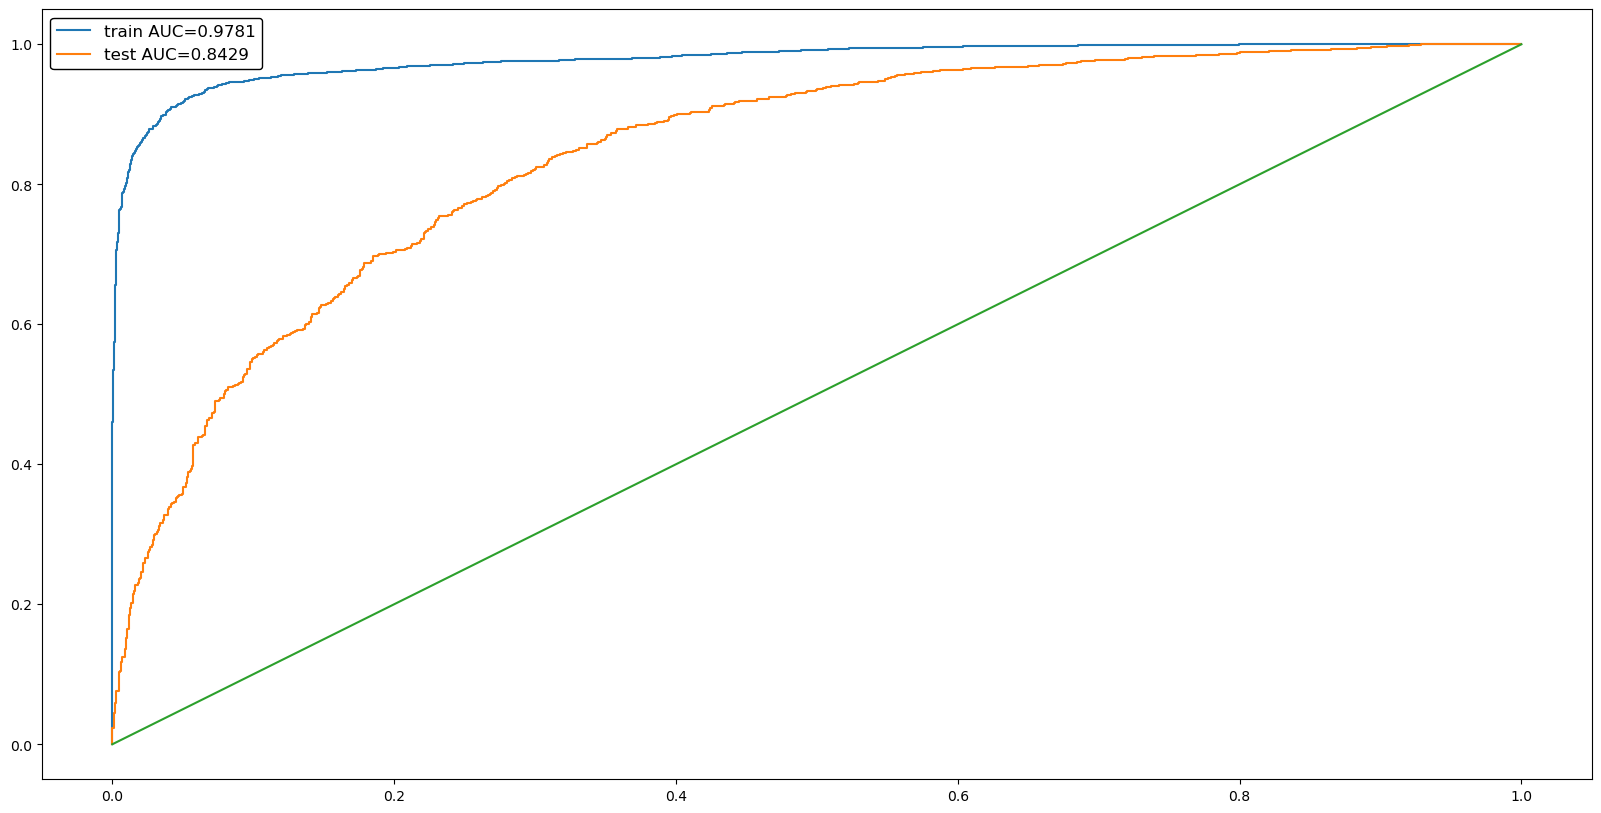

In [44]:
# Отрисовываем метрики по обученной модели

y_train_predicted = best_ctb.predict_proba(train[feature_cols])[:, 1]
y_valid_predicted = best_ctb.predict_proba(valid[feature_cols])[:, 1]

train_auc = roc_auc_score(train[target_col], y_train_predicted)
test_auc = roc_auc_score(valid[target_col], y_valid_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(train[target_col], y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(valid[target_col], y_valid_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [45]:
#Значение надежнотси для модели catboost
y_train_predicted = best_ctb.predict(train[feature_cols])
y_valid_predicted = best_ctb.predict(valid[feature_cols])

# Вычисление метрик для тренировочного набора
train_accuracy = accuracy_score(train[target_col], y_train_predicted)
train_recall = recall_score(train[target_col], y_train_predicted)
train_precision = precision_score(train[target_col], y_train_predicted)
train_f1 = f1_score(train[target_col], y_train_predicted)
train_auc_roc = roc_auc_score(train[target_col], y_train_predicted)

# Вычисление метрик для тестового набора
test_accuracy = accuracy_score(valid[target_col], y_valid_predicted)
test_recall = recall_score(valid[target_col], y_valid_predicted)
test_precision = precision_score(valid[target_col], y_valid_predicted)
test_f1 = f1_score(valid[target_col], y_valid_predicted)
test_auc_roc = roc_auc_score(valid[target_col], y_valid_predicted)

# Вывод результатов
print("Тренировочный набор:")
print(f"Accuracy: {train_accuracy:.5f}")
print(f"Recall: {train_recall:.5f}")
print(f"Precision: {train_precision:.5f}")
print(f"F1-score: {train_f1:.5f}")
print(f"AUC-ROC: {train_auc_roc:.5f}")

print("\nТестовый набор:")
print(f"Accuracy: {test_accuracy:.5f}")
print(f"Recall: {test_recall:.5f}")
print(f"Precision: {test_precision:.5f}")
print(f"F1-score: {test_f1:.5f}")
print(f"AUC-ROC: {test_auc_roc:.5f}")

Тренировочный набор:
Accuracy: 0.93341
Recall: 0.93195
Precision: 0.93137
F1-score: 0.93166
AUC-ROC: 0.93338

Тестовый набор:
Accuracy: 0.75996
Recall: 0.79533
Precision: 0.73616
F1-score: 0.76460
AUC-ROC: 0.76065


In [46]:
# Создаем метофакторы для трейн множества

meta_features_train = pd.DataFrame({'logreg_proba':best_logreg.predict_proba(train[cols])[:, 1],
                                    'ctb_proba':best_ctb.predict_proba(train[feature_cols])[:, 1]
                                   })
meta_features_train.head()

,logreg_proba,ctb_proba
0,0.445395,0.757031
1,0.586563,0.745759
2,0.193651,0.186188
3,0.708251,0.453329
4,0.194362,0.164573


In [47]:
# Создаем метофакторы для валидационного множества

meta_features_valid = pd.DataFrame({'logreg_proba':best_logreg.predict_proba(valid[cols])[:, 1],
                                    'ctb_proba':best_ctb.predict_proba(valid[feature_cols])[:, 1]
                                   })
meta_features_valid.head()

,logreg_proba,ctb_proba
0,0.651793,0.831889
1,0.347677,0.411957
2,0.493283,0.732031
3,0.615196,0.544288
4,0.465893,0.507596


In [48]:
# Задаем сетку для метомодели

meta_parameters = {'penalty':['l1', 'l2'],
                   'C':[0.001, 0.01, 0.1, 1, 10, 100]}

In [49]:
# Подбираем гиперпараметры метомодели

CV_model = GridSearchCV(estimator=model_logreg,
                        param_grid=meta_parameters,
                        cv=3,
                        scoring='roc_auc',
                        n_jobs=-1,
                        verbose=0)

CV_model.fit(meta_features_train, train[target_col])

C:\Users\glebh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\glebh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\glebh\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\glebh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [50]:
# Лучшие параметры

CV_model.best_params_

{'C': 100, 'penalty': 'l2'}

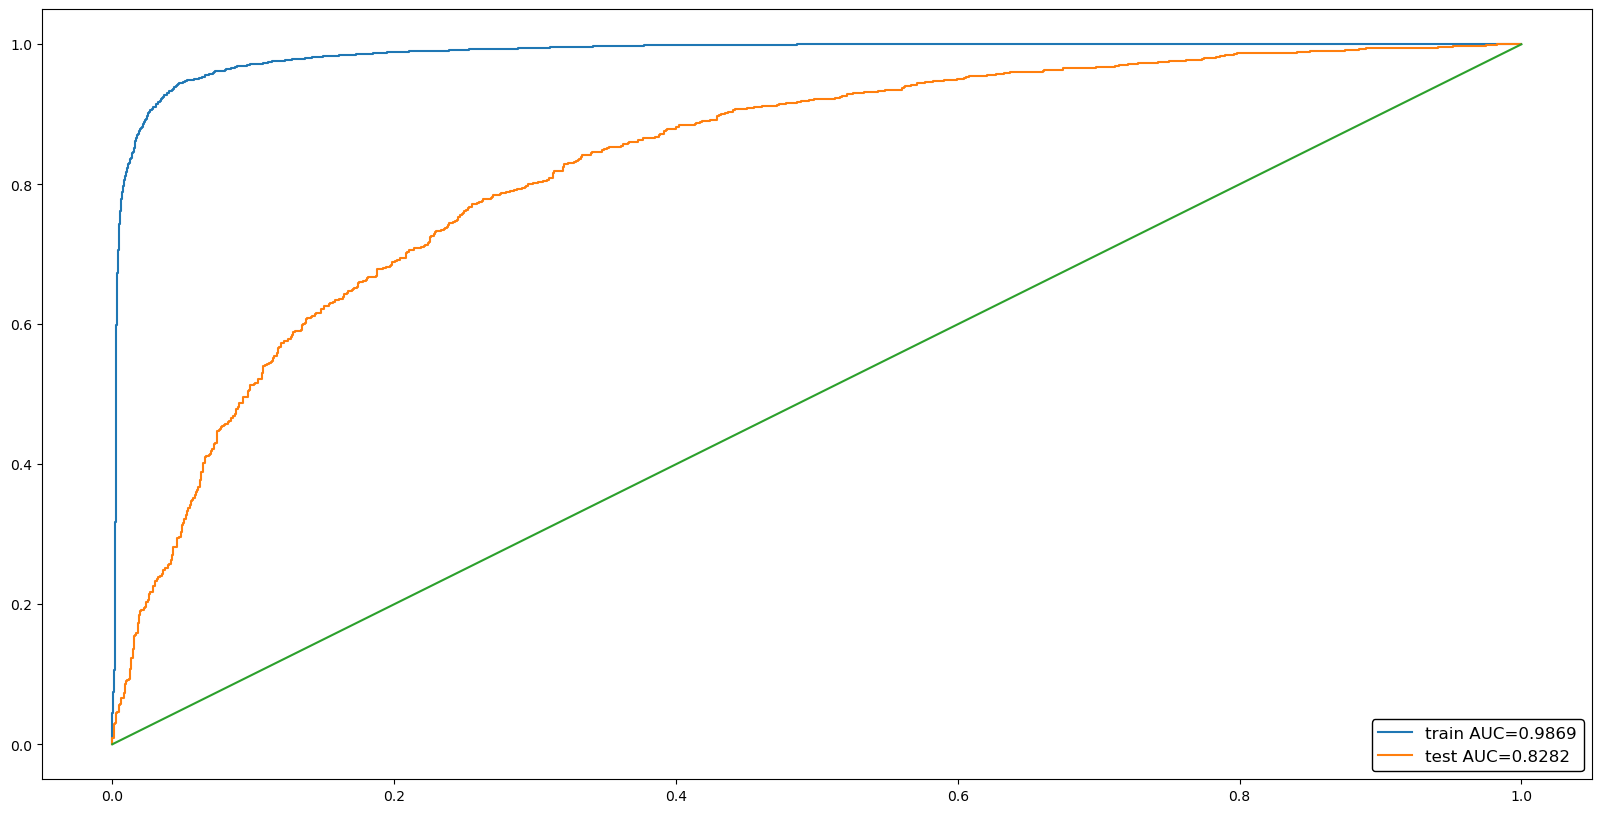

In [51]:
# Финализируем и тестируем метомодель

stacking_model = LogisticRegression(**CV_model.best_params_)
stacking_model.fit(meta_features_train, train[target_col])

y_train_predicted = stacking_model.predict_proba(meta_features_train)[:, 1]
y_valid_predicted = stacking_model.predict_proba(meta_features_valid)[:, 1]

train_auc = roc_auc_score(train[target_col], y_train_predicted)
test_auc = roc_auc_score(valid[target_col], y_valid_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(train[target_col], y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(valid[target_col], y_valid_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [52]:
y_train_predicted = stacking_model.predict(meta_features_train)
y_valid_predicted = stacking_model.predict(meta_features_valid)

# Вычисление метрик для тренировочного набора
train_accuracy = accuracy_score(train[target_col], y_train_predicted)
train_recall = recall_score(train[target_col], y_train_predicted)
train_precision = precision_score(train[target_col], y_train_predicted)
train_f1 = f1_score(train[target_col], y_train_predicted)
train_auc_roc = roc_auc_score(train[target_col], y_train_predicted)

# Вычисление метрик для тестового набора
test_accuracy = accuracy_score(valid[target_col], y_valid_predicted)
test_recall = recall_score(valid[target_col], y_valid_predicted)
test_precision = precision_score(valid[target_col], y_valid_predicted)
test_f1 = f1_score(valid[target_col], y_valid_predicted)
test_auc_roc = roc_auc_score(valid[target_col], y_valid_predicted)

# Вывод результатов
print("Тренировочный набор:")
print(f"Accuracy: {train_accuracy:.5f}")
print(f"Recall: {train_recall:.5f}")
print(f"Precision: {train_precision:.5f}")
print(f"F1-score: {train_f1:.5f}")
print(f"AUC-ROC: {train_auc_roc:.5f}")

print("\nТестовый набор:")
print(f"Accuracy: {test_accuracy:.5f}")
print(f"Recall: {test_recall:.5f}")
print(f"Precision: {test_precision:.5f}")
print(f"F1-score: {test_f1:.5f}")
print(f"AUC-ROC: {test_auc_roc:.5f}")

Тренировочный набор:
Accuracy: 0.94808
Recall: 0.94481
Precision: 0.94838
F1-score: 0.94659
AUC-ROC: 0.94799

Тестовый набор:
Accuracy: 0.75630
Recall: 0.77383
Precision: 0.74061
F1-score: 0.75686
AUC-ROC: 0.75664
